# 학습 목표
* 딥러닝 모델 학습을 위한 다양한 개념과 기술들을 설명할 수 있습니다.
* 모델 학습이 잘 안될 경우 발생하는 과소적합/과대적합에 대해 설명할 수 있습니다.
* IMDB 데이터셋을 이용해 긍정/부정 분류를 위한 딥러닝 모델을 만들어봅니다.

# 01 모델 학습 기술
아래의 그림으로 모델 학습 기술에 대해 이해할 수 있다.
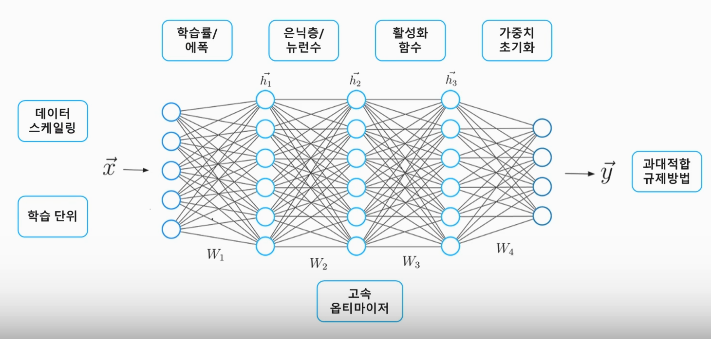

## 학습 단위
* 전통적인 통계기법에서는 모든 데이터를 한번에 알고리즘에 넣고 분석하는 전체 배시(Full Batch)방식을 사용한다.
* 전체 데이터중 랜덤으로 추출하여 알고리즘에 넣는 Stochastic 방식
* 전체 데이터중 일부씩 모델에 사용하는 미니배치(Mini Batch) 방식을 사용한다.
* 딥러닝은 큰 데이터를 사용하기 때문에 전체 데이터를 한 번에 다 넣는게 어렵기 때문에 미니배치 방식을 사용한다.
* 즉, 데이터를 한 번에 불러와서 학습 시키는 것은 많은 리소스가 낭비되기 때문
* 학번 학습할 때 얼마만큼의 미니배치 크기를 사용할지 결정해야하고 배치 크기가 작을수록 학습 시간이 많이 소요되고 클수록 학습시간이 적게 소요된다.

## 데이터 스케일링 (Data Scaling)
* 데이터의 스케일이 다를 경우 딥러닝 모델 학습시에 제대로 동작하지 않을 수 있다.
* 모든 특성의 범위나 분포를 같도록 해주는것이 좋다
* 표준화(Standardization)
  * 주로 사용되는 스케일링로 특성들의 평균을 0, 분산을 1로 스케일링 하는 방법으로 특성들을 정규분포를 만드는 과정
* 정규화(Normalization)
  * 특성들을 특정 범위로 스케일링하는 방법으로 주로 가장 작은 값은 0, 가장 큰 값은 1로 변환시켜 모든 특성들이 0~1 범위를 가지도록 함

## 학습률과 에폭
* 모델의 학습 정도가 학습률에 따라 달라지므로 적절한 학습률을 찾는 것이 핵심이다.
* 학습률은 가중치의 조정 단위라고 할 수 있고, 오차가 최소화되도록 얼마 만큼의 간격으로 변경할 것인가를 정하는 문제이다.
* 만약 학습률이 너무 크면 최소값을 오버슈트(Overshoot)가 되거나 반대로 너무 작으면 최소값에 이르기 전에 학습이 멈춘다.
* 에폭은 한 번의 학습 과정을 몇 번 수행하맂 지정하는 것으로 학습 횟수를 너무 작게, 또는 너무 크게 지정하면 과소적함 또는 과대적합이 발생할 수 있다.
* 여러번 진행하면서 최적의 학습 횟수(epochs)값을 찾아야함
* 학습률과 에폭간의 관계는 학습률이 적을수록 에폭이 커야하고 배치 크기도 관련이 있고,    
  다만 학습 속돠와 연산이 지속적으로 반복되기 때문에 cost / loss의 변화를 봐야한다.
* 학습률이 적을수록 에폭이 큰 이유 : 학습률이 작은 경우 최저값에 도달하기까지 업데이트 횟수가 더 많이 필요하다

## 은닉층과 뉴런수 (Hidden Layer & Neurons)
* 모델을 구성할 때 은닉층을 어떻게 구성하고 얼마나 쌓을지 그리고 뉴런의 수를 얼마나 많이 구성할지에 따라서    
  모델의 크기가 달라지고, 그에 따라서 학습과 최적화 정도에 차이가 발생한다.

    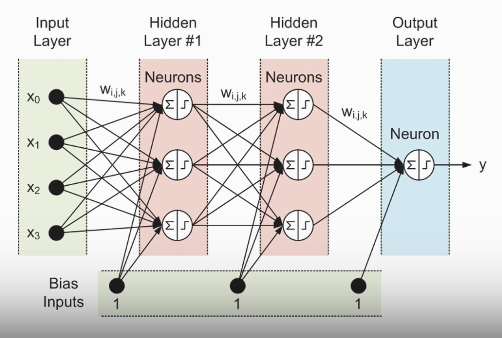

## 활성화 함수 (Activation Function)
* 딥러닝 성능에 주요 요소 중 하나로 가중치 (weight)와 바이어스(bias)를 조정
* 어떤 활성화 함수를 사용하는지에 따라서 모델이 얼마나 잘 학습되는지에 영향을 미친다.
* 활성화 함수는 크게 시그모이드(Sigmoid) 계열과 ReLU 계열로 구분한다.
  * 시그모이드 계열은 결과값이 [0,1], 혹은 [-1,1] 사이의 값이 나온다
  * 렐루 계열은 예외를 제외하면 0을 중심으로 양수는 양수 그대로를, 음수는 0이나 0에 가까운 수를 내놓는다.

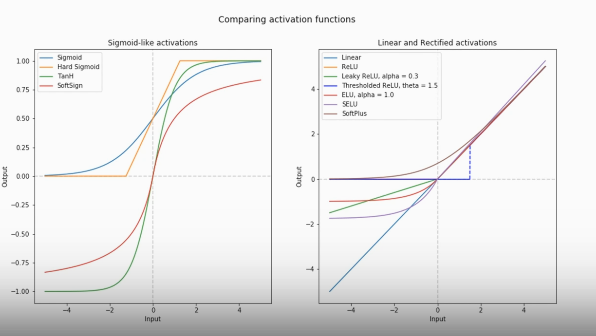

## 가중치 초기화 (Weight Initialization)
* 초기에 가중치의 값을 어떻게 하는지도 모델 학습에 중요한 부분이다
* 만약 초기값을 0으로 할 경우 모든 노드들의 값이 같아서 여러 노드들을 사용하는 의미가 없어지므로 동일한 값을 가지지 않도록 무작위로 설정해야함
* 가중치 초기화를 확률분포를 사용하여 정규분포를 가지도록 하면 가중치의 값이 일부 값으로 치우치게되고,    
  그러면 활성화 함수를 통과한 값이 치우치게 되고, 표현할 수 있는 신경망의 수가 적어지게 되는 문제가 있다.
* 가중치 초기화는 활성화값이 골고루 분포되는 것이 중요하다
* 적절하게 가중치를 초기화하는 방법으로 Xavier & Bengio, He 등이 간단하게 설정하는 방법을 제안한다.
* Xavier(Glorot)방법은 은닉층의 노드의 수가 $n$ 이라면 표준편차가 $\frac{1}{\sqrt{n}}$인 분포를 가지도록 한다.
* Xavier 초기화는 더 많은 가중치에 역전파가 전달 가능하고, 비교적 많은 문제를 표현할 수 있으며 활성화 함수가 선형인 함수일 때 매우 적합하다.
* He 초기화 방법은 표준편차가 $\sqrt{\frac{2}{n}}$인 분포를 가지며, 활성화값 분포가 균일하게 분포되어 있다
* He 초기화는 활성화 함수가 ReLU와 같은 비선형 함수 일 때 더 적합하다.
* **적절한 가중치 최적값을 정해주면 표현할 수 있는 신경망의 수가 많아지고 더 많은 가중치에 역전파가 전달 가능하며 비교적 많은 문제를 표현할 수 있게된다**

## 옵티마이저 (Optimizer)
옵티마이저는 모델이 실제 결과와 예측 결과의 차이를 최소화하는 역할을 수행한다.    
* SGD : 확률적 경사 하강법 (Stochastic Gradient Descent)은 최소점을 찾는 과정에서 멈추거나 매우 속도가 느리지만 모멘텀과 네스테로프 모멘텀 (Nesterov momentum) 그리고 확습률 감소 기법(learning rate decay)을 지원한다.
* RMSprop : 가장 최근의 그래디언트만 반영하여 전력 최적점을 수렴하는 방법으로 지수적 감소를 사용하여 구현한다.
* Adagrad : 그래디언트 벡터값을 스케일링 하여 단위로 인한 경사 하강의 오류를 수정하는 방법으로 변화하는 기울기 전체의 내역을 고려한다.
* Adadelta : Adagread는 너무 빨리 기울기를 0으로 만들어버려서 그래디언트 업데이트의 이동창 (moving window)에 기반하여 학습률을 조절한다.
* Adam : ADaptive Moment estimator의 줄임말로 모멘텀 최적화와 RMSprop를 병합한 방법이다. (제일 많이 사용됨)

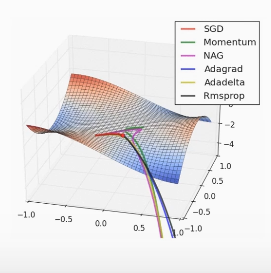

# 02 과소적합과 과대적합 (Underfitting vs Overfitting)

## 과소적합
* 학습 데이터를 충분히 학습하지 않아 성능이 매우 안 좋은 경우
* 모델이 지나치게 단순한 경우에 발생하며, 해결하기 위해서는 학습 데이터를 충분히 수집하거나 보다 더 복잡한 모델을 사용해야 한다.
* 에폭수 (epochs)를 늘려 충분히 학습할 수 있도록 해야한다.

## 과대적합
* 모델이 학습 데이터에 지나치게 맞추어진 상태
* 새로운 데이터에서는 모델의 성능 저하가 발생하는 경우이며 주로 학습 데이터가 매우    
  적거나 모델이 지나치게 복잡한 경우 그리고 학습 횟수가 매우 많을 경우 발생한다.
* 과대적합을 해결하기 위해서는 다양한 학습 데이터를 후집 및 학습하거나 파라미터가    
  적은 모델을 선택하거나 학습 데이터의 특성 수를 줄이는 등 모델을 단순화할 필요가 있다.

## 03 IMDB 딥러닝 모델 예제

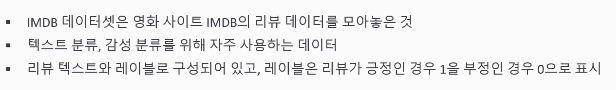
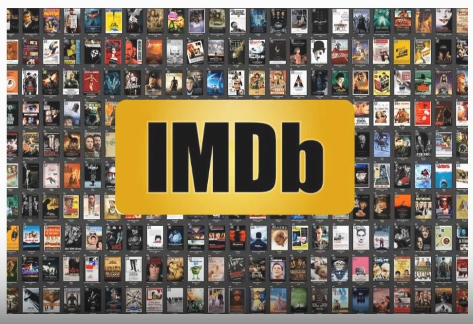

### 데이터 로드 및 전처리
케라스에서는 IMDB 영화 리뷰 데이터를 imdb.load_data() 함수를 통해 다운로드가 가능합니다.     
예제로 사용하는 것이니 num_words는 10000개로만 제한하여 데이터를 로드합니다. 즉, 단어의 인덱스는 0부터 9999까지만 구성됩니다.

train_data의 0번째를 출력해보면 단어들의 인덱스가 출력되는 것을 알 수 있습니다.     
그리고 train_label의 0번째를 출력하면 긍정을 의미하는 1이 출력되는 것을 알 수 있습니다.

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# train_data의 0번째, train_label의 0번째 출력해보기
print(train_data[0])
print(train_labels[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


IMDB의 데이터셋은 인덱스로만 구성되어 있기 때문에 실제 단어들로 변환하기 위해서는 단어 인덱스 딕셔너리를 이용해야하며,     
imdb.get_word_index() 함수를 통해 얻을 수 있습니다.    
아래 코드블럭의 주석을 풀면 word_index 딕셔너리를 확인하실 수 있습니다.

In [3]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

단어 인덱스 딕셔너리를 인덱스 단어 딕셔너리 형태로 역으로 변환시킵니다.    
아래 코드블럭의 주석을 풀면 index_word 딕셔너리를 확인하실 수 있습니다.

In [4]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
index_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

imdb.get_word_index() 함수를 통해 얻은 데이터의 index는 단어 출현 빈도 기준으로 내림차수 정렬되어있습니다.     
따라서 아래 코드블럭의 index_word 의 키 값을 바꿔가며 해당 출현 빈도 순에 해당하는 단어를 살펴볼 수 있어요.

In [5]:
# 1 순위의 출현 빈도를 기록한 단어를 출력합니다.
# 키 값의 숫자를 바꿔가며 다른 순위의 단어들도 확인해볼 수 있어요!
index_word[1]

'the'

index_word의 키를 바꿔가며 출현 순위별 단어를 확인해보았다면 아래 코드를 작성해보세요.

Q. 25번째 단어를 키로 삼아 word_index에 어떤 값(value)가 담겨있는지 확인해 봅시다.

In [10]:
word_25th = word_25th = list(word_index.keys())[24] # 인덱스는 0부터 시작하므로 24를 적습니다.
print(word_25th)

# 해당 단어의 인덱스 값 출력
print(word_index[word_25th])

spider'
52016


In [9]:
# train_data[0]의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들기
review = ' '.join([str(i) for i in train_data[0]])
review

'1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 2 9 35 480 284 5 150 4 172 112 167 2 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 2 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 2 8 4 107 117 5952 15 256 4 2 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 2 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32'

In [11]:
review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

텍스트 데이터를 딥러닝 모델의 학습에 사용하기 위해서는 원-핫 인코딩(one-hot encoding)을 이용해 0과 1의 벡터로 변환하여 Dense 레이어를 사용하는 방법이 있고,     
그 밖에도 고정 길이를 가지도록 패딩(padding)을 추가하고 임베딩(embedding) 레이어를 사용하는 방법이 있습니다.     
이 예제에서는 10000 차원을 가지는 원-핫 인코딩으로 IMDB 데이터를 처리하도록 합니다.

In [12]:
def one_hot_encoding(data, dim=10000): # imdb 데이터의 num_words를 10000으로 설정해서 dim도 10000으로 맞춰줍니다.
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [13]:
# IMDB의 레이블은 1은 긍정, 0은 부정으로 정의되어 있는데, 정수형 값을 실수형 값으로 변환
print(train_labels[0])
print(test_labels[0])

1
0


In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0])
print(y_test[0])

1.0
0.0


### 모델 구성
이제 실제 IMDB 데이터셋을 학습하고 긍정/부정을 분류할 딥러닝 모델을 정의    
`Sequential()` 함수를 이용해서 순차적으로 레이어를 추가    
* 첫번째 레이어는 Dense로 유닛수 16개를 가지고, input_shape을 (10000, )으로 정의하여 10000 차원의 데이터를 입력으로 받을 수 있게 합니다.
* 활성화 함수인 activation은 relu로 사용하고, 레이어의 이름인 name을 input으로 지정합니다.
* 두번째 레이어도 마찬가지로 Dense로 유닛수 16개를 가지고, relu 활성화 함수를 사용하고 이름은 hidden으로 지정합니다.
* 세번째 레이어도 Dense 레이어를 사용하지만, 긍정/부정 결과만 받도록 유닛수는 1개만 가지고, 활성화 함수는 sigmoid를 사용하고, 이름은 output으로 지정합니다.

In [15]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(16, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

C:\Users\nini\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 모델 컴파일 및 학습

이제 정의한 모델을 컴파일을 통해서 옵티마이저인 optimizer는 rmsprop를 사용하고, 손실 함수인 loss는 긍정/부정만 분류하므로 binary_crossentropy를 지정합니다.     
그리고 지표인 metrics는 accuracy를 사용합니다. 이제 summary() 함수를 사용해 모델의 구조를 시각화합니다.

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

이제 딥러닝 모델을 학습하기 위해 fit() 함수를 실행시킵니다.     
학습에 사용되는 데이터로 x_train과 y_train을 지정하고, 에폭 수인 epochs는 20으로 지정하고, 배치 사이즈인 batch_size는 512로 지정합니다.     
그리고 검증을 위해서 테스트 데이터인 x_test와 y_test를 지정해줍니다.

In [17]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 294ms/step - accuracy: 0.7237 - loss: 0.5687 - val_accuracy: 0.8760 - val_loss: 0.3532
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9017 - loss: 0.2904 - val_accuracy: 0.8884 - val_loss: 0.2891
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9253 - loss: 0.2171 - val_accuracy: 0.8745 - val_loss: 0.3115
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9369 - loss: 0.1866 - val_accuracy: 0.8818 - val_loss: 0.2942
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9466 - loss: 0.1568 - val_accuracy: 0.8787 - val_loss: 0.3125
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9520 - loss: 0.1418 - val_accuracy: 0.8767 - val_loss: 0.3195
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9588 - loss: 0.1277 - val_accuracy: 0.8759 - val_loss: 0.3324
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9597 - loss: 0.1196 - val_accuracy: 0.8740 -

학습하며 저장된 모델의 지표 결과인 history에서 loss, val_loss, accuracy, val_accuracy를 차트로 시각화

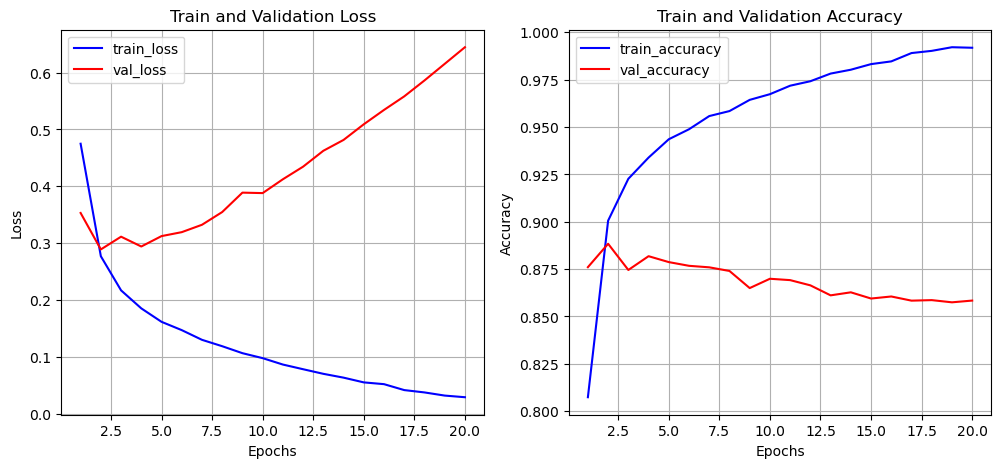

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

딥러닝 모델의 결과를 살펴보면 val_loss가 점점 증가하는 것을 알 수 있고, val_accuracy는 점점 감소하는 것을 알 수 있습니다.     
즉, **과대적합되어 학습용 데이터셋에 대해서만 모델이 적합하게 된 것을 알 수 있다.**

# 최종 학습 정리
이번 노드에서는 모델 학습 기술 7가지에 대한 학습이였다.
* 학습단위는 전체 데이터를 한번에 학습하는 전체 배치와 일부 데이터만 묵어서 학습하는 미니배치가 있는데 딥러닝에서는 미니배치를 사용한다.    
* 데이터 스케일링에서는 평균 0, 표준편차 1로하는 표준화와 0~1사이로 값을 압축하는 정규화를 사용한다.
* 학습률이 너무 큰 경우는 오버슈트가 발생할 수 있고 너무 작으면 학습전에 멈출 수 있다.
* 에폭 의경우 전체 데이터를 몇번 반복 학습할지 정하는 횟수로 과적합/과소적합 방지를 위해 조절할 필요가있다.
* 모델의 크기는 은닉층과 뉴런수에 따라 달라지고 학습 영향을 준다.
* 활성화함수는 가중치와 바이어스를 조정하여 선형적인 시그모이드 계열과 비선형적인 ReLU 계열로 구분합니다.
* 가중치 초기화는 적절한 가중치 최적값을 정할시 많은 신경망과 더 많은 가중치역전파가 가능해 비교적 많은 문제를 표현하게된다.
* 옵티마이저는 모델이 실제 결과와 예측 결과의 차이를 최소화하는 역할을 하며 현재는 Adam이 제일 많이 사용된다.
* IMDB 리뷰 데이터셋을 사용하여 과대적합된 모델을 확인해보았다.